In [2]:
%pylab inline
import pandas as pd
import json

Populating the interactive namespace from numpy and matplotlib


## 将数据加载到 DataFrame

In [3]:
records = [json.loads(line) for line in open('../data/datasets/bitly_usagov/example.txt')]
frame = pd.DataFrame(records)  # 从列表创建 DataFrame

## 数据准备

In [4]:
# 规整时区数据
frame['tz'].fillna('Missing')   #  填充 缺失值 NA
frame[frame['tz']=='']='Unknown' # 填充空值

## 数据转换

In [5]:
# 按值统计个数
tz_counts = frame['tz'].value_counts()

# 从USER_AGENT 数据中获取客户浏览器类型数据
results = pd.Series([x.split()[0] for x in frame.a.dropna()])

# 从USER_AGENT 数据中获取客户操作系统数据
cframe = frame[frame.a.notnull()]
operating_system = np.where(cframe['a'].str.contains('Windows'),'Windows','Not Windows')

# 将时区按照操作系统分组
by_tz_os = cframe.groupby(['tz',operating_system])

# 按分组计数，然后用 unstack重塑 数据
agg_counts = by_tz_os.size().unstack().fillna(0)

# 以按行加和并排序的数据作为索引
indexer = agg_counts.sum(1).argsort()
#用  take 函数,  通过索引取出时区最多的值
count_subset = agg_counts.take(indexer)[-10:]

## 建模和计算

暂无

## 结果展示

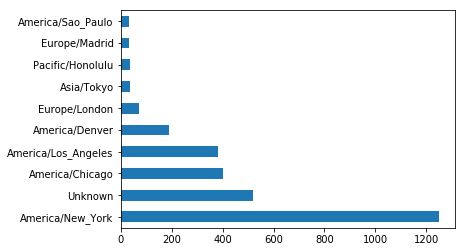

In [6]:
# TOP10 时区
tz_counts[:10].plot(kind='barh')

In [7]:
# TOP10 时区的操作系统数量（表）
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
Unknown,521.0,0.0


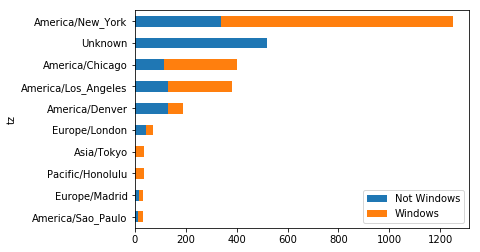

In [8]:
# TOP10 时区的操作系统数量（图）
count_subset.plot(kind = 'barh',stacked = True)

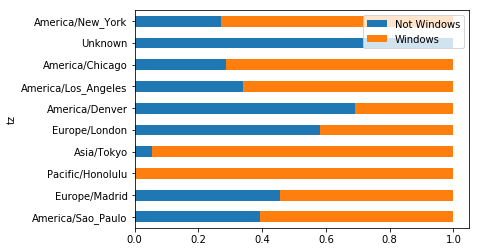

In [9]:
# TOP10 时区的操作系统比例（图）
normed_subset = count_subset.div(count_subset.sum(1),axis = 0)
normed_subset.plot(kind = 'barh',stacked = True)